In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from dataprep.eda import create_report

In [210]:
df = pd.read_csv("Bank_data.csv")


## Посмотрим на данные

In [211]:
# create_report(df).show()

In [212]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0000,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1.0000,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8.0000,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1.0000,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0000,125510.8200,1,1,1,79084.1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0000,0.0000,2,1,0,96270.6400,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0000,57369.6100,1,1,1,101699.7700,0
9997,9998,15584532,Liu,709,France,Female,36,7.0000,0.0000,1,0,1,42085.5800,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0000,75075.3100,2,1,0,92888.5200,1


In [213]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,10000.0000,10000.0000,10000.0000,9091.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,5000.5000,15690940.5694,650.5288,38.9218,4.9977,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,2886.8957,71936.1861,96.6533,10.4878,2.8947,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,1.0000,15565701.0000,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,2500.7500,15628528.2500,584.0000,32.0000,2.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,5000.5000,15690738.0000,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,7500.2500,15753233.7500,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,10000.0000,15815690.0000,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [215]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [216]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

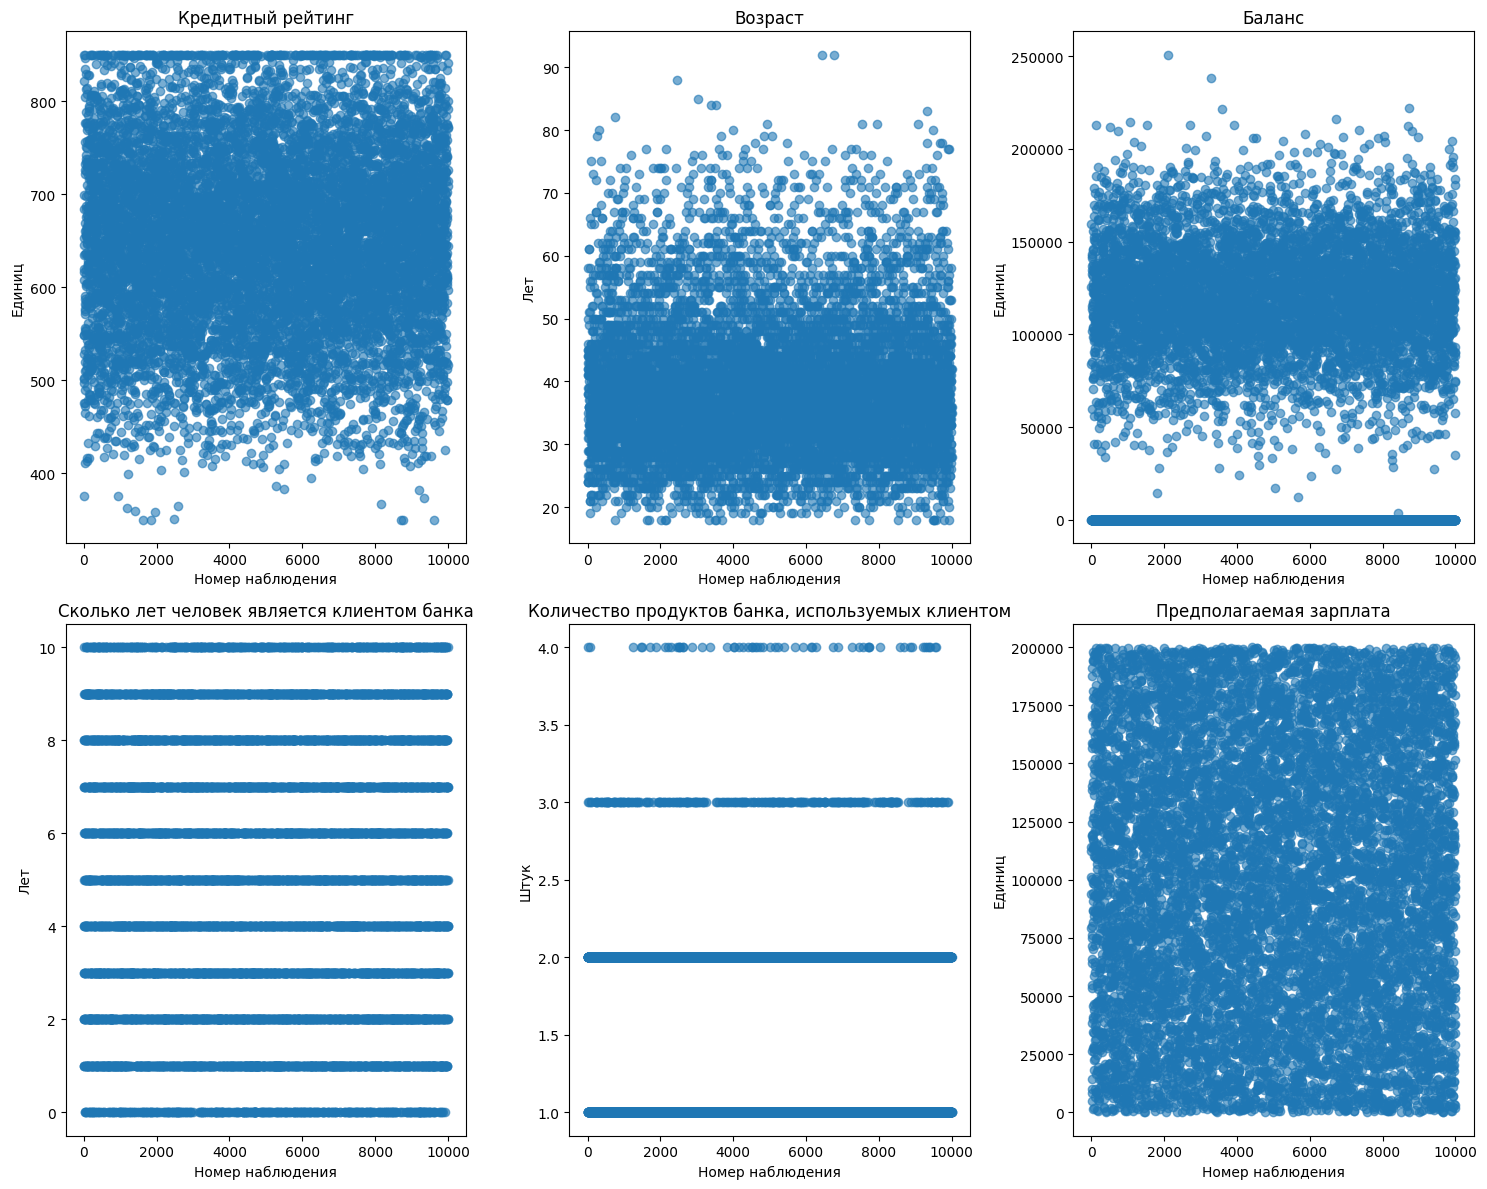

In [217]:
# Облака точек
variables = [
    ('CreditScore', 'Кредитный рейтинг', 'Единиц'),
    ('Age', 'Возраст', 'Лет'),
    ('Balance', 'Баланс', 'Единиц'),
    ('Tenure', 'Сколько лет человек является клиентом банка', 'Лет'),
    ('NumOfProducts', 'Количество продуктов банка, используемых клиентом', 'Штук'),
    ('EstimatedSalary', 'Предполагаемая зарплата', 'Единиц')
]

fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()  # Преобразуем в одномерный массив для удобства

for i, (col, title, ylabel) in enumerate(variables):
    axes[i].scatter(range(len(df)), df[col], alpha=0.6)
    axes[i].set_title(title)
    axes[i].set_ylabel(ylabel)
    axes[i].set_xlabel('Номер наблюдения')

plt.tight_layout()
plt.show()

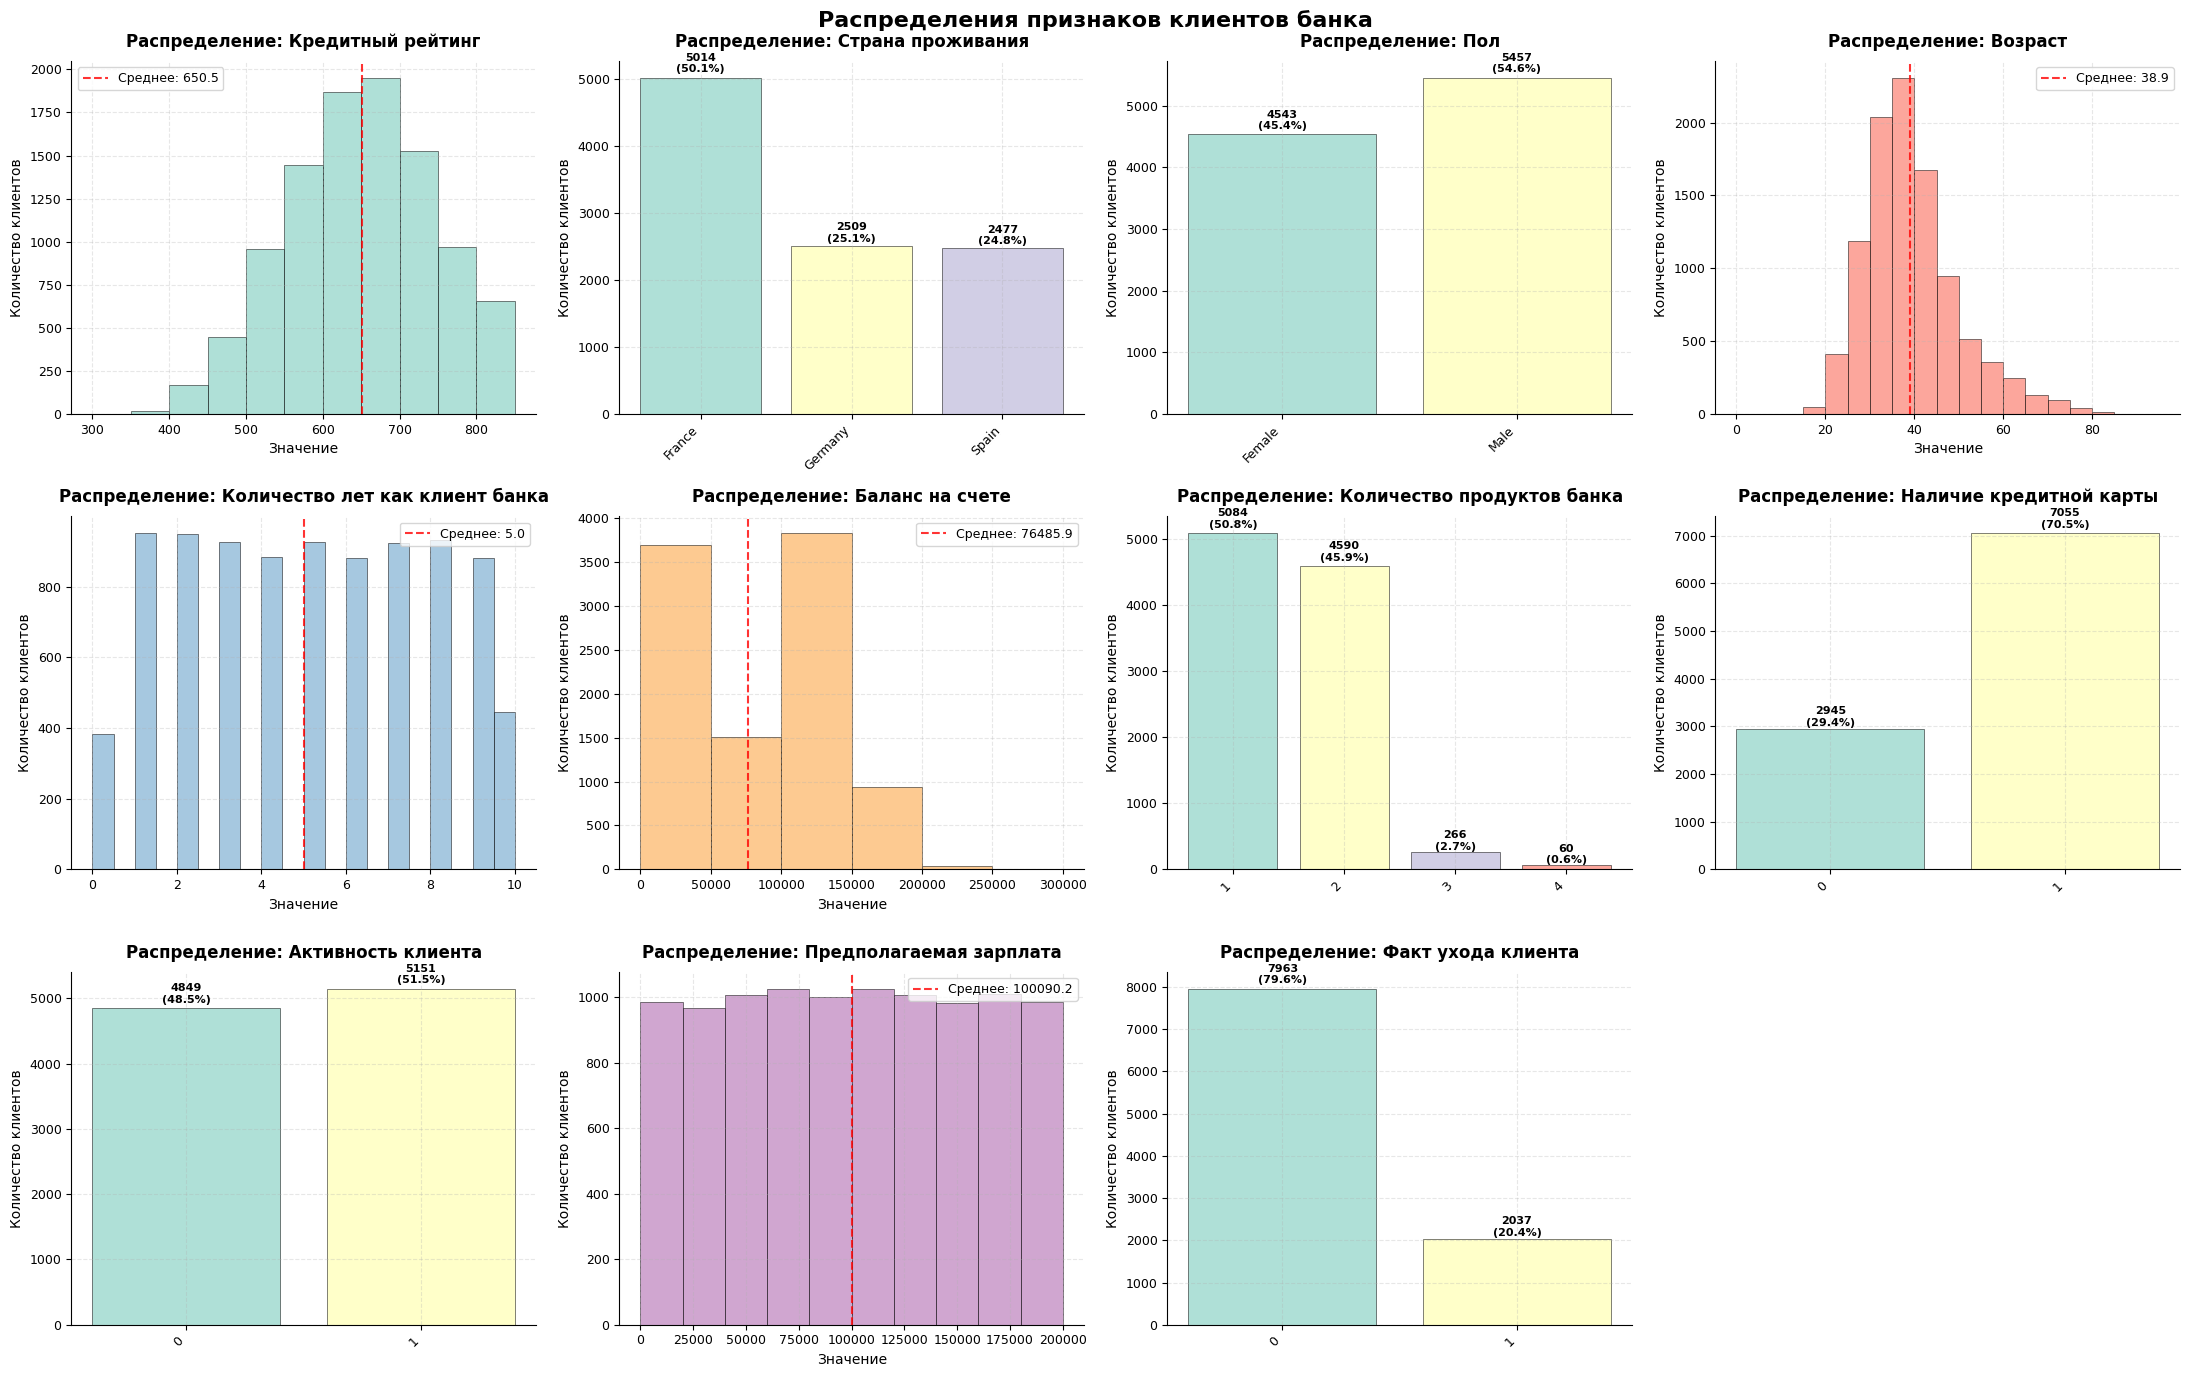

📊 Статистика по числовым признакам:

Кредитный рейтинг:
  Среднее: 650.53
  Медиана: 652.00
  Стандартное отклонение: 96.65
  Минимум: 350.00
  Максимум: 850.00

Возраст:
  Среднее: 38.92
  Медиана: 37.00
  Стандартное отклонение: 10.49
  Минимум: 18.00
  Максимум: 92.00

Баланс на счете:
  Среднее: 76485.89
  Медиана: 97198.54
  Стандартное отклонение: 62397.41
  Минимум: 0.00
  Максимум: 250898.09

Предполагаемая зарплата:
  Среднее: 100090.24
  Медиана: 100193.91
  Стандартное отклонение: 57510.49
  Минимум: 11.58
  Максимум: 199992.48

Количество лет как клиент банка:
  Среднее: 5.00
  Медиана: 5.00
  Стандартное отклонение: 2.89
  Минимум: 0.00
  Максимум: 10.00

📈 Статистика по категориальным признакам:

Страна проживания:
  France: 5014 (50.1%)
  Germany: 2509 (25.1%)
  Spain: 2477 (24.8%)

Пол:
  Male: 5457 (54.6%)
  Female: 4543 (45.4%)

Количество продуктов банка:
  1: 5084 (50.8%)
  2: 4590 (45.9%)
  3: 266 (2.7%)
  4: 60 (0.6%)

Наличие кредитной карты:
  1: 7055 (70.5%)
  

In [218]:
# Создаем красивую сетку графиков
fig, axes = plt.subplots(3, 4, figsize=(22, 14))
axes = axes.flatten()

# Словарь с описаниями столбцов
column_descriptions = {
    'CreditScore': 'Кредитный рейтинг',
    'Geography': 'Страна проживания',
    'Gender': 'Пол',
    'Age': 'Возраст',
    'Tenure': 'Количество лет как клиент банка',
    'Balance': 'Баланс на счете',
    'NumOfProducts': 'Количество продуктов банка',
    'HasCrCard': 'Наличие кредитной карты',
    'IsActiveMember': 'Активность клиента',
    'EstimatedSalary': 'Предполагаемая зарплата',
    'Exited': 'Факт ухода клиента'
}

columns = list(column_descriptions.keys())

# Цветовая схема
colors = plt.cm.Set3(np.linspace(0, 1, 12))

for i, col in enumerate(columns):
    if i < len(axes):
        value_counts = df[col].value_counts().sort_index()
        
        # Для числовых признаков с большим количеством уникальных значений используем гистограмму
        if df[col].nunique() > 10 and df[col].dtype != 'object':
            # Биннинг для числовых данных
            if col == 'Age':
                bins = np.arange(0, 100, 5)
            elif col == 'CreditScore':
                bins = np.arange(300, 900, 50)
            elif col == 'Balance':
                bins = np.arange(0, df[col].max() + 50000, 50000)
            elif col == 'EstimatedSalary':
                bins = np.arange(0, df[col].max() + 20000, 20000)
            else:
                bins = 20
                
            axes[i].hist(df[col], bins=bins, alpha=0.7, color=colors[i], edgecolor='black', linewidth=0.5)
            axes[i].set_title(f'Распределение: {column_descriptions[col]}', fontsize=12, fontweight='bold', pad=10)
            axes[i].set_ylabel('Количество клиентов', fontsize=10)
            axes[i].set_xlabel('Значение', fontsize=10)
            
            # Добавляем статистику
            mean_val = df[col].mean()
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, linewidth=1.5, 
                           label=f'Среднее: {mean_val:.1f}')
            axes[i].legend(fontsize=9)
            
        else:
            # Для категориальных данных используем bar plot
            bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                             alpha=0.7, color=colors[:len(value_counts)], 
                             edgecolor='black', linewidth=0.5)
            
            axes[i].set_title(f'Распределение: {column_descriptions[col]}', fontsize=12, fontweight='bold', pad=10)
            axes[i].set_ylabel('Количество клиентов', fontsize=10)
            axes[i].set_xticks(range(len(value_counts)))
            
            # Форматируем подписи для лучшей читаемости
            if col == 'Geography':
                labels = [str(x) for x in value_counts.index]
            else:
                labels = value_counts.index
                
            axes[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
            
            # Добавляем значения на столбцы
            for bar, count in zip(bars, value_counts.values):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                           f'{count}\n({count/len(df)*100:.1f}%)', 
                           ha='center', va='bottom', fontsize=8, fontweight='bold')
        
        # Настраиваем внешний вид
        axes[i].grid(True, alpha=0.3, linestyle='--')
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        
        # Увеличиваем отступы для подписей
        axes[i].tick_params(axis='both', which='major', labelsize=9)

# Скрываем последний лишний subplot
axes[-1].set_visible(False)

# Добавляем общий заголовок
plt.suptitle('Распределения признаков клиентов банка', fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Дополнительно: выведем статистику по числовым признакам
print("📊 Статистика по числовым признакам:")
print("="*50)
numeric_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
for col in numeric_cols:
    if col in df.columns:
        print(f"\n{column_descriptions[col]}:")
        print(f"  Среднее: {df[col].mean():.2f}")
        print(f"  Медиана: {df[col].median():.2f}")
        print(f"  Стандартное отклонение: {df[col].std():.2f}")
        print(f"  Минимум: {df[col].min():.2f}")
        print(f"  Максимум: {df[col].max():.2f}")

# Статистика по категориальным признакам
print(f"\n📈 Статистика по категориальным признакам:")
print("="*50)
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{column_descriptions[col]}:")
        value_counts = df[col].value_counts()
        for val, count in value_counts.items():
            percentage = count / len(df) * 100
            print(f"  {val}: {count} ({percentage:.1f}%)")

## Проверим наличие дубликатов

In [219]:
#Поиск полных дубликатов
full_duplicates = df[df.duplicated(keep=False)]
print(f"Количество полных дубликатов: {len(full_duplicates)}")


Количество полных дубликатов: 0


In [220]:
# Поиск неполных дубликатов по ключевым столбцам
partial_duplicates = df[df.duplicated(subset=['CustomerId', 'Surname', 'Geography', 'Gender', 'Age'], keep=False)]
print(f"Количество неполных дубликатов: {len(partial_duplicates)}")


Количество неполных дубликатов: 0


In [221]:
def check_data_quality(df):
    """
    Проверяет датафрейм на:
    - Уникальность CustomerId
    - Отрицательные значения в Age и Tenure
    - Отрицательные значения в Balance и EstimatedSalary

    Возвращает датафрейм с флагами ошибок.
    """

    # Копия датафрейма для добавления флагов
    df_check = df.copy()

    # Проверка на уникальность CustomerId
    duplicate_customer_ids = df_check['CustomerId'].duplicated(keep=False)
    df_check['is_duplicate_customer_id'] = duplicate_customer_ids

    # Проверка на отрицательные значения в Age и Tenure
    df_check['is_negative_age'] = df_check['Age'] < 0
    df_check['is_negative_tenure'] = df_check['Tenure'] < 0

    # Проверка на отрицательные или нулевые значения в Balance и EstimatedSalary
    df_check['is_invalid_balance'] = df_check['Balance'] < 0
    df_check['is_invalid_estimated_salary'] = df_check['EstimatedSalary'] < 0

    # Вывод информации о найденных ошибках
    print("Результаты проверки:")
    print(f"- Количество дубликатов CustomerId: {duplicate_customer_ids.sum()}")
    print(f"- Количество строк с отрицательным Age: {df_check['is_negative_age'].sum()}")
    print(f"- Количество строк с отрицательным Tenure: {df_check['is_negative_tenure'].sum()}")
    print(f"- Количество строк с некорректным Balance: {df_check['is_invalid_balance'].sum()}")
    print(f"- Количество строк с некорректным EstimatedSalary: {df_check['is_invalid_estimated_salary'].sum()}")

    return df_check

# Пример использования:
df_checked = check_data_quality(df)
print(df_checked[['CustomerId', 'is_duplicate_customer_id', 'is_negative_age', 'is_negative_tenure', 'is_invalid_balance', 'is_invalid_estimated_salary']])

Результаты проверки:
- Количество дубликатов CustomerId: 0
- Количество строк с отрицательным Age: 0
- Количество строк с отрицательным Tenure: 0
- Количество строк с некорректным Balance: 0
- Количество строк с некорректным EstimatedSalary: 0
      CustomerId  is_duplicate_customer_id  is_negative_age  \
0       15634602                     False            False   
1       15647311                     False            False   
2       15619304                     False            False   
3       15701354                     False            False   
4       15737888                     False            False   
...          ...                       ...              ...   
9995    15606229                     False            False   
9996    15569892                     False            False   
9997    15584532                     False            False   
9998    15682355                     False            False   
9999    15628319                     False            False   


Дубликатов не нашлось, страннно но ладно, нет так нет

## Удалим столбцы `RowNumber`, `Surname`, `CustomerId` так как для модели они не репрезентативны

In [222]:
df_feature = df.copy()

# Удаляем столбцы БЕЗ inplace=True
df_feature_clean = df_feature.drop(["RowNumber", "Surname", "CustomerId"], axis=1)

# Кодирование на df_feature_clean, а не на исходном df
df_feature_clean = pd.get_dummies(df_feature_clean, columns=['Geography'], prefix='Geo')
df_feature_clean = pd.get_dummies(df_feature_clean, columns=['Gender'], prefix='Gender')

print(df_feature_clean.columns)
df_feature_clean

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geo_France',
       'Geo_Germany', 'Geo_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,42,2.0000,0.0000,1,1,1,101348.8800,1,1,0,0,1,0
1,608,41,1.0000,83807.8600,1,0,1,112542.5800,0,0,0,1,1,0
2,502,42,8.0000,159660.8000,3,1,0,113931.5700,1,1,0,0,1,0
3,699,39,1.0000,0.0000,2,0,0,93826.6300,0,1,0,0,1,0
4,850,43,2.0000,125510.8200,1,1,1,79084.1000,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0000,0.0000,2,1,0,96270.6400,0,1,0,0,0,1
9996,516,35,10.0000,57369.6100,1,1,1,101699.7700,0,1,0,0,0,1
9997,709,36,7.0000,0.0000,1,0,1,42085.5800,1,1,0,0,1,0
9998,772,42,3.0000,75075.3100,2,1,0,92888.5200,1,0,1,0,0,1


## Введем бинарный признак для нулевого баланса тк как это может быть признаком новых пользователей со своим поведением
так же категоризируем баланс в целом и применим Layble encoding 

In [223]:
# One-hot для нулевого баланса
df_feature_clean['Balance_Zero'] = (df_feature_clean['Balance'] == 0).astype(int)

# Для label encoding используем исходный баланс (исключая нули)
# Создаем группы, где 0 - отдельная категория
def balance_to_label(balance):
    if balance == 0:
        return 0  # Zero
    elif balance <= 100000:
        return 1  # Low
    elif balance <= 120000:
        return 2  # Medium
    elif balance <= 160000:
        return 3  # High
    else:
        return 4  # Very High

df_feature_clean['Balance_Level'] = df_feature_clean['Balance'].apply(balance_to_label)

df_feature_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male,Balance_Zero,Balance_Level
0,619,42,2.0000,0.0000,1,1,1,101348.8800,1,1,0,0,1,0,1,0
1,608,41,1.0000,83807.8600,1,0,1,112542.5800,0,0,0,1,1,0,0,1
2,502,42,8.0000,159660.8000,3,1,0,113931.5700,1,1,0,0,1,0,0,3
3,699,39,1.0000,0.0000,2,0,0,93826.6300,0,1,0,0,1,0,1,0
4,850,43,2.0000,125510.8200,1,1,1,79084.1000,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0000,0.0000,2,1,0,96270.6400,0,1,0,0,0,1,1,0
9996,516,35,10.0000,57369.6100,1,1,1,101699.7700,0,1,0,0,0,1,0,1
9997,709,36,7.0000,0.0000,1,0,1,42085.5800,1,1,0,0,1,0,1,0
9998,772,42,3.0000,75075.3100,2,1,0,92888.5200,1,0,1,0,0,1,0,1


## сделаем Label encoding по возрастным группам
выделим возможные возрастные группы с осбым поведением с помощью One-hot encoding

In [224]:
# Создаем возрастные категории
df_feature_clean['Age_Group'] = pd.cut(df_feature_clean['Age'], 
                                     bins=[0, 20, 25, 35, 45, 55, 60, 100],
                                     labels=['Under_20', '20_25', '26_35', '36_45', '46_55', '56_60', '60_Plus'])

# One-hot encoding для особых возрастных категорий
df_feature_clean['Age_Under_20'] = (df_feature_clean['Age'] < 20).astype(int)
df_feature_clean['Age_60_Plus'] = (df_feature_clean['Age'] >= 60).astype(int)

# Label encoding для остальных возрастных групп (используем ТЕ ЖЕ МЕТКИ)
age_group_labels = {
    'Under_20': 0,
    '20_25': 1,    # ← ИСПРАВЛЕНО: было '18_25'
    '26_35': 2,
    '36_45': 3,
    '46_55': 4,
    '56_60': 5,
    '60_Plus': 6
}
df_feature_clean['Age_Group_Encoded'] = df_feature_clean['Age_Group'].map(age_group_labels)

# Проверяем результат
print("Пропуски в Age_Group_Encoded:", df_feature_clean['Age_Group_Encoded'].isna().sum())
print("Распределение Age_Group_Encoded:")
print(df_feature_clean['Age_Group_Encoded'].value_counts().sort_index())

# Удаляем промежуточный столбец
df_feature_clean = df_feature_clean.drop('Age_Group', axis=1)

Пропуски в Age_Group_Encoded: 0
Распределение Age_Group_Encoded:
0      89
1     522
2    3542
3    3736
4    1311
5     336
6     464
Name: Age_Group_Encoded, dtype: int64


## Таким же образом выделим группы по `CreditScore`

In [225]:
# One-hot для критически важных категорий CreditScore
df_feature_clean['CreditScore_Very_Poor'] = (df_feature_clean['CreditScore'] < 500).astype(int)  # Очень рискованные
df_feature_clean['CreditScore_Excellent'] = (df_feature_clean['CreditScore'] >= 800).astype(int) # Премиальные клиенты

# Label encoding с использованием стандартных кредитных категорий
def credit_score_to_detailed_group(score):
    if score < 500:
        return 0  # Very_Poor - уже есть в one-hot
    elif score < 580:
        return 1  # Poor
    elif score < 670:
        return 2  # Fair
    elif score < 740:
        return 3  # Good
    elif score < 800:
        return 4  # Very_Good
    else:
        return 5  # Excellent - уже есть в one-hot

df_feature_clean['CreditScore_Category'] = df_feature_clean['CreditScore'].apply(credit_score_to_detailed_group)

In [226]:
# Дополнительный признак - средний и выше кредитный рейтинг
df_feature_clean['CreditScore_Good_Plus'] = (df_feature_clean['CreditScore'] >= 670).astype(int)

In [227]:
df_feature_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,...,Gender_Male,Balance_Zero,Balance_Level,Age_Under_20,Age_60_Plus,Age_Group_Encoded,CreditScore_Very_Poor,CreditScore_Excellent,CreditScore_Category,CreditScore_Good_Plus
0,619,42,2.0000,0.0000,1,1,1,101348.8800,1,1,...,0,1,0,0,0,3,0,0,2,0
1,608,41,1.0000,83807.8600,1,0,1,112542.5800,0,0,...,0,0,1,0,0,3,0,0,2,0
2,502,42,8.0000,159660.8000,3,1,0,113931.5700,1,1,...,0,0,3,0,0,3,0,0,1,0
3,699,39,1.0000,0.0000,2,0,0,93826.6300,0,1,...,0,1,0,0,0,3,0,0,3,1
4,850,43,2.0000,125510.8200,1,1,1,79084.1000,0,0,...,0,0,3,0,0,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0000,0.0000,2,1,0,96270.6400,0,1,...,1,1,0,0,0,3,0,0,4,1
9996,516,35,10.0000,57369.6100,1,1,1,101699.7700,0,1,...,1,0,1,0,0,2,0,0,1,0
9997,709,36,7.0000,0.0000,1,0,1,42085.5800,1,1,...,0,1,0,0,0,3,0,0,3,1
9998,772,42,3.0000,75075.3100,2,1,0,92888.5200,1,0,...,1,0,1,0,0,3,0,0,4,1


## Посмотрим матрицу корреляций 
Возможно это поможет понять как нам заполнить пропуски в `Tenure`

/tmp/ipykernel_1621/1510051673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_feature_clean.corr()


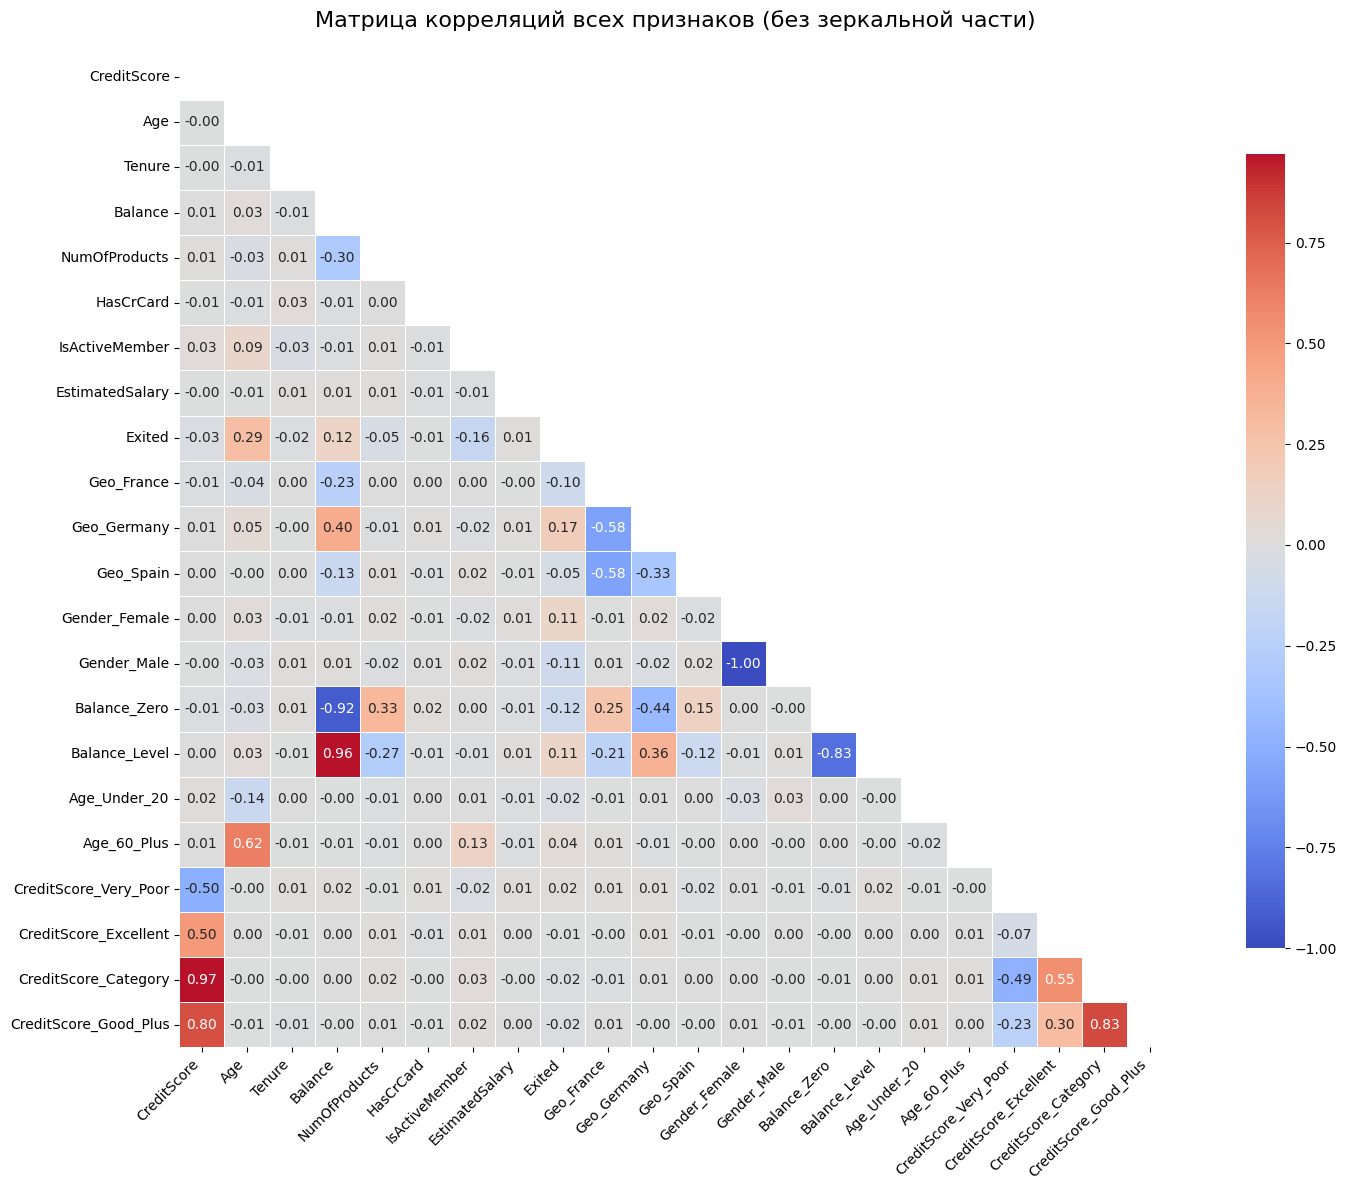

In [228]:
# Создаем матрицу корреляций
correlation_matrix = df_feature_clean.corr()

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Строим heatmap без зеркальной части
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            mask=mask)

plt.title('Матрица корреляций всех признаков (без зеркальной части)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Удалим `CreditScore` и `Balance ` так как мы их перевели в категориальные признаки

In [229]:
# Удалим CreditScore и Balance
df_feature_clean = df_feature_clean.drop(columns=['CreditScore','Balance'], axis=1)


# Создаем копию что бы потом попробовать заполнить умнее
df_tenure_clean = df_feature_clean.copy()

## Пока заполним пропуски в `Tenure` медианой, отметив признаком что это пропуск 

In [230]:
# Создаем признак-индикатор пропусков
df_feature_clean['Tenure_Missing'] = df_feature_clean['Tenure'].isna().astype(int)

# Заполняем пропуски медианой
tenure_median = df_feature_clean['Tenure'].median()
df_feature_clean['Tenure'] = df_feature_clean['Tenure'].fillna(tenure_median)

print("После заполнения:")
print(f"Tenure_Missing: {df_feature_clean['Tenure_Missing'].sum()} пропусков было")
print(f"Медиана Tenure: {df_feature_clean['Tenure'].median()}")

# Проверяем, есть ли закономерность в пропусках
if 'Exited' in df_feature_clean.columns:
    print(f"\nСвязь пропусков с уходом клиентов:")
    print(df_feature_clean.groupby('Tenure_Missing')['Exited'].mean())

После заполнения:
Tenure_Missing: 909 пропусков было
Медиана Tenure: 5.0

Связь пропусков с уходом клиентов:
Tenure_Missing
0   0.2039
1   0.2013
Name: Exited, dtype: float64


Пропуски случайные, признак пропуска в `Tenure` скорее всего бесполезный

In [231]:
df_feature_clean

,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,...,Balance_Zero,Balance_Level,Age_Under_20,Age_60_Plus,Age_Group_Encoded,CreditScore_Very_Poor,CreditScore_Excellent,CreditScore_Category,CreditScore_Good_Plus,Tenure_Missing
0,42,2.0000,1,1,1,101348.8800,1,1,0,0,...,1,0,0,0,3,0,0,2,0,0
1,41,1.0000,1,0,1,112542.5800,0,0,0,1,...,0,1,0,0,3,0,0,2,0,0
2,42,8.0000,3,1,0,113931.5700,1,1,0,0,...,0,3,0,0,3,0,0,1,0,0
3,39,1.0000,2,0,0,93826.6300,0,1,0,0,...,1,0,0,0,3,0,0,3,1,0
4,43,2.0000,1,1,1,79084.1000,0,0,0,1,...,0,3,0,0,3,0,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5.0000,2,1,0,96270.6400,0,1,0,0,...,1,0,0,0,3,0,0,4,1,0
9996,35,10.0000,1,1,1,101699.7700,0,1,0,0,...,0,1,0,0,2,0,0,1,0,0
9997,36,7.0000,1,0,1,42085.5800,1,1,0,0,...,1,0,0,0,3,0,0,3,1,0
9998,42,3.0000,2,1,0,92888.5200,1,0,1,0,...,0,1,0,0,3,0,0,4,1,0


In [232]:
df_feature_clean.isna().sum()

Age                      0
Tenure                   0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
Geo_France               0
Geo_Germany              0
Geo_Spain                0
Gender_Female            0
Gender_Male              0
Balance_Zero             0
Balance_Level            0
Age_Under_20             0
Age_60_Plus              0
Age_Group_Encoded        0
CreditScore_Very_Poor    0
CreditScore_Excellent    0
CreditScore_Category     0
CreditScore_Good_Plus    0
Tenure_Missing           0
dtype: int64


=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ БЕЗ БАЛАНСИРОВКИ ===

=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ С БАЛАНСИРОВКОЙ ===
=== СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===

БЕЗ балансировки:
Accuracy:  0.8250
Recall:    0.2654 
Precision: 0.6792
F1-Score:  0.3816
ROC-AUC:   0.7920
Предсказано 1: 159/2000

С балансировкой:
Accuracy:  0.7250
Recall:    0.7199 
Precision: 0.4019
F1-Score:  0.5158
ROC-AUC:   0.7915
Предсказано 1: 729/2000

=== АНАЛИЗ УЛУЧШЕНИЯ ===
Recall улучшился на: 0.4545 (171.3%)
Accuracy изменился на: -0.1000


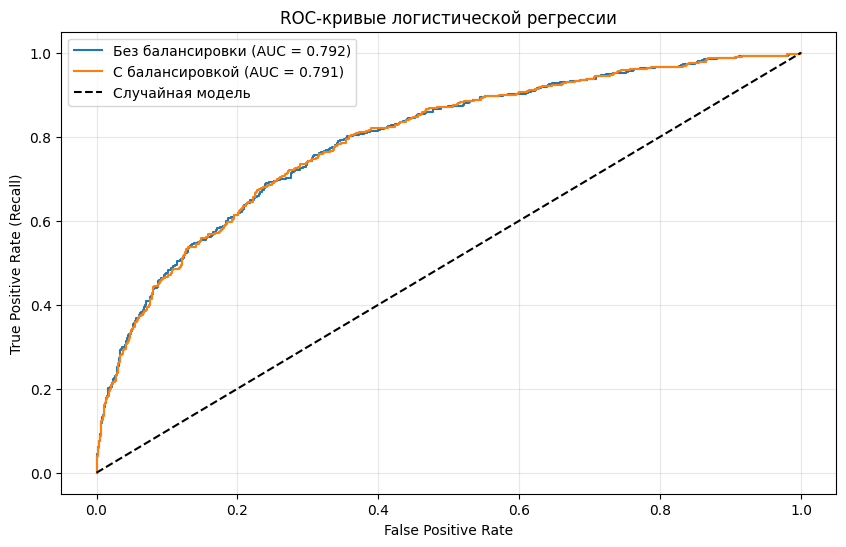

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Подготовка данных
X = df_feature_clean.drop('Exited', axis=1)
y = df_feature_clean['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование с проверкой NaN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Логистическая регрессия БЕЗ балансировки
print("\n=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ БЕЗ БАЛАНСИРОВКИ ===")
lr_no_balance = LogisticRegression(random_state=42, max_iter=1000)
lr_no_balance.fit(X_train_scaled, y_train)

y_pred_no_balance = lr_no_balance.predict(X_test_scaled)
y_proba_no_balance = lr_no_balance.predict_proba(X_test_scaled)[:, 1]

# 3. Логистическая регрессия С балансировкой
print("\n=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ С БАЛАНСИРОВКОЙ ===")
lr_balanced = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'
)
lr_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = lr_balanced.predict(X_test_scaled)
y_proba_balanced = lr_balanced.predict_proba(X_test_scaled)[:, 1]

# 4. Сравнение результатов
def print_metrics(y_true, y_pred, y_proba, model_name):
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    
    print(f"\n{model_name}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Recall:    {recall:.4f} ")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"Предсказано 1: {sum(y_pred)}/{len(y_pred)}")
    
    return recall, accuracy

print("=== СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===")
recall_no_balance, accuracy_no_balance = print_metrics(y_test, y_pred_no_balance, y_proba_no_balance, 
                                                      "БЕЗ балансировки")
recall_balanced, accuracy_balanced = print_metrics(y_test, y_pred_balanced, y_proba_balanced, 
                                                  "С балансировкой")

# 5. Анализ улучшения
print(f"\n=== АНАЛИЗ УЛУЧШЕНИЯ ===")
print(f"Recall улучшился на: {recall_balanced - recall_no_balance:.4f} "
      f"({(recall_balanced - recall_no_balance)/recall_no_balance*100:.1f}%)")
print(f"Accuracy изменился на: {accuracy_balanced - accuracy_no_balance:.4f}")

# 6. ROC-кривые
plt.figure(figsize=(10, 6))

# ROC для модели без балансировки
fpr_no_balance, tpr_no_balance, _ = roc_curve(y_test, y_proba_no_balance)
roc_auc_no_balance = roc_auc_score(y_test, y_proba_no_balance)

# ROC для модели с балансировкой
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_proba_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_proba_balanced)

plt.plot(fpr_no_balance, tpr_no_balance, label=f'Без балансировки (AUC = {roc_auc_no_balance:.3f})')
plt.plot(fpr_balanced, tpr_balanced, label=f'С балансировкой (AUC = {roc_auc_balanced:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC-кривые логистической регрессии')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Без балансировки (взвешивания) точность выше, однако для нашей задачи точность плохо подходит как целевая метрика, так как при сильном дисбалансе классов мажоритарный класс игнорируется

Это видно по метрике Recall

Метрика F1-Score позволяет найти баланс между Precision и Recall

Модель с балансировкой дает меньшую общую точность, однако гораздо лучше определяет уход клиента, что видно по росту метрик Recall и F1-Score

## Попробуем использовать GridSearch для подбора гиперпараметров при обучении
модели логистическая регрессия с взвешиванием и без

Размер тренировочной выборки: (8000, 21)
Размер тестовой выборки: (2000, 21)
Распределение классов в тренировочной выборке:
0   0.7963
1   0.2037
Name: Exited, dtype: float64

=== СОЗДАНИЕ ПАЙПЛАЙНОВ С ОБРАБОТКОЙ NaN ===

=== ПОИСК ГИПЕРПАРАМЕТРОВ ===
Поиск параметров для модели БЕЗ балансировки...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth


Поиск параметров для модели С балансировкой...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

=== ЛУЧШИЕ ПАРАМЕТРЫ ===
Без балансировки: {'classifier__C': 0.01, 'classifier__solver': 'liblinear'}
С балансировкой: {'classifier__C': 0.01, 'classifier__solver': 'liblinear'}

=== ПРЕДСКАЗАНИЯ НА ТЕСТЕ ===

=== СРАВНЕНИЕ МОДЕЛЕЙ ===

БЕЗ балансировки (с GridSearch):
Accuracy:  0.8200
Recall:    0.2334
Precision: 0.6643
F1-Score:  0.3455
ROC-AUC:   0.7905
Предсказано 1: 143/2000
Матрица ошибок:
[[1545   48]
 [ 312   95]]

С балансировкой (с GridSearch):
Accuracy:  0.7195
Recall:    0.7174
Precision: 0.3957
F1-Score:  0.5100
ROC-AUC:   0.7902
Предсказано 1: 738/2000
Матрица ошибок:
[[1147  446]
 [ 115  292]]

=== АНАЛИЗ УЛУЧШЕНИЯ ===
Recall улучшился на: 0.4840 (207.4%)
F1-Score улучшился на: 0.1646 (47.6%)
ROC-AUC улучшился на: -0.0003
Accuracy изменился на: -0.1005


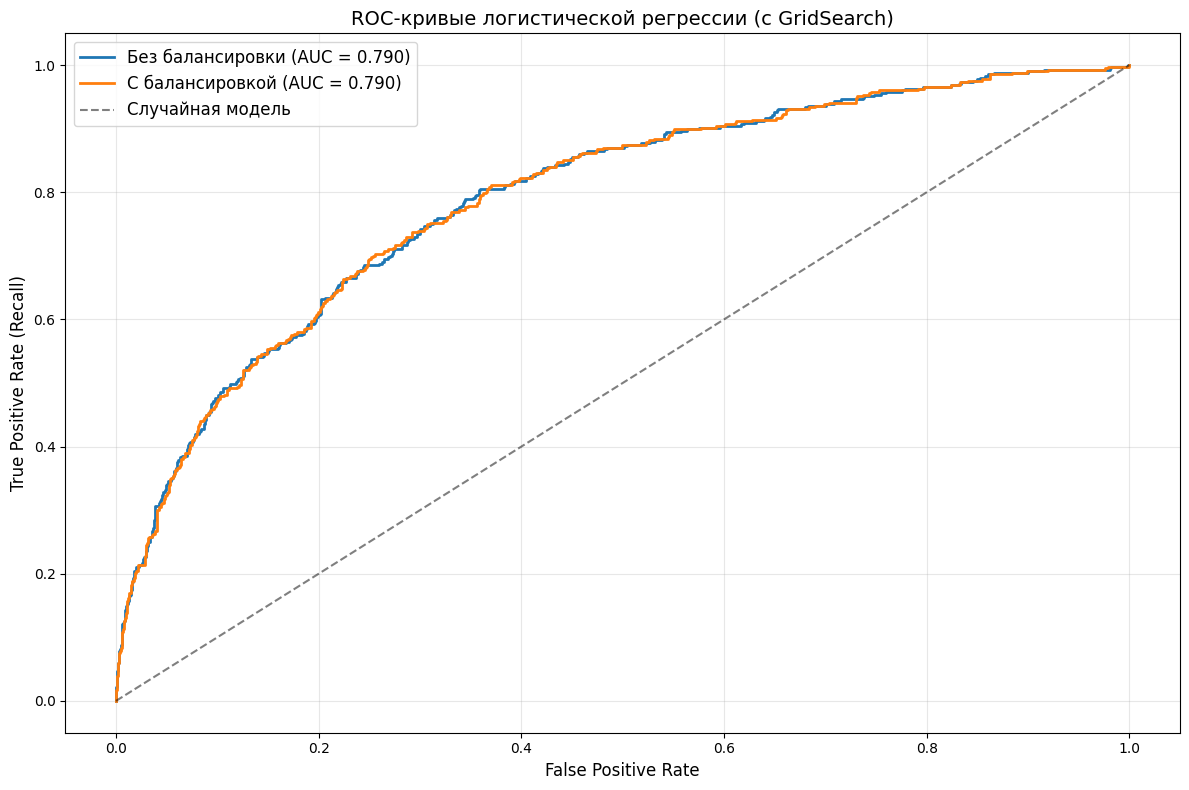


=== ДЕТАЛЬНЫЙ ОТЧЕТ ПО ЛУЧШЕЙ МОДЕЛИ ===
Лучшая модель: С балансировкой
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.40      0.72      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.72      0.74      2000


=== ВАЖНОСТЬ ПРИЗНАКОВ ЛУЧШЕЙ МОДЕЛИ ===
Топ-10 самых важных признаков:
              feature  importance      direction
0                 Age      0.5792  положительная
15  Age_Group_Encoded      0.4377  положительная
14        Age_60_Plus      0.4105  отрицательная
4      IsActiveMember      0.4019  отрицательная
7         Geo_Germany      0.2217  положительная
9       Gender_Female      0.1280  положительная
10        Gender_Male      0.1280  отрицательная
6          Geo_France      0.1197  отрицательная
12      Balance_Level      0.1016  положительная
11       Balance_Zero      0.0951  от

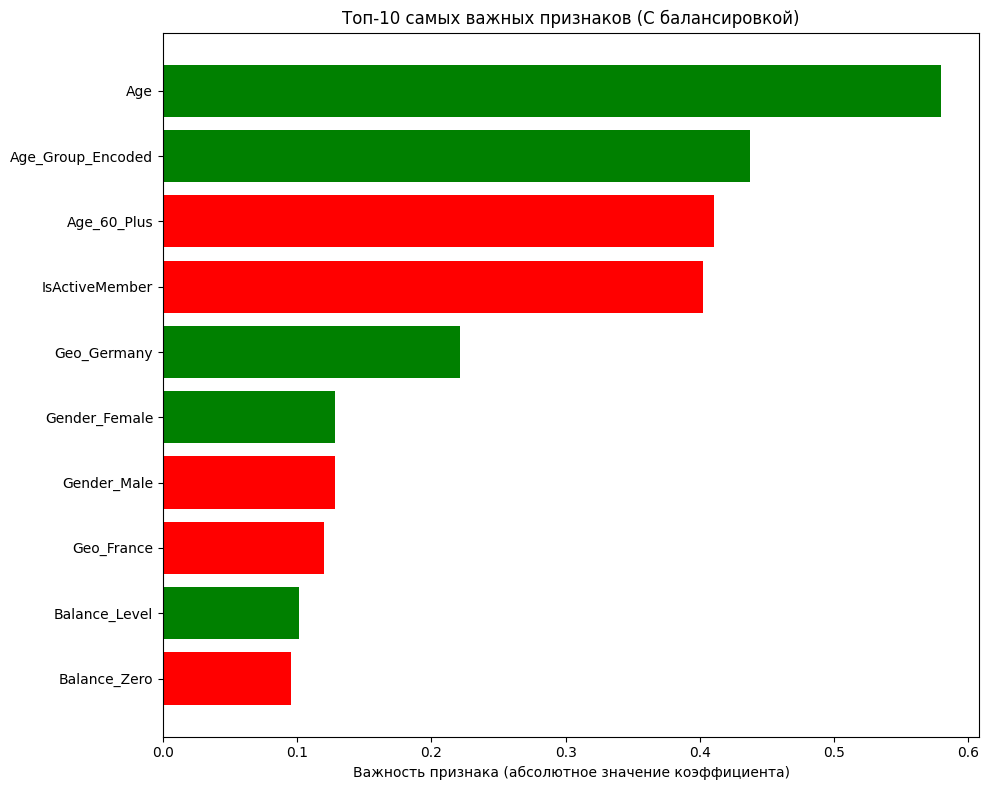


=== ПРОСТАЯ МОДЕЛЬ ДЛЯ БАЗОВОГО СРАВНЕНИЯ ===

Простая модель (без подбора параметров):
Accuracy:  0.8250
Recall:    0.2654
Precision: 0.6792
F1-Score:  0.3816
ROC-AUC:   0.7920
Предсказано 1: 159/2000
Матрица ошибок:
[[1542   51]
 [ 299  108]]


In [234]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Подготовка данных
X = df_feature_clean.drop('Exited', axis=1)
y = df_feature_clean['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в тренировочной выборке:\n{y_train.value_counts(normalize=True)}")


# 2. Создание пайплайнов с обработкой пропущенных значений
print("\n=== СОЗДАНИЕ ПАЙПЛАЙНОВ С ОБРАБОТКОЙ NaN ===")

# Пайплайн без балансировки
pipeline_no_balance = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Пайплайн с балансировкой
pipeline_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

# 3. Упрощенная сетка параметров (для начала)
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear']
}

print("\n=== ПОИСК ГИПЕРПАРАМЕТРОВ ===")

# Поиск для модели без балансировки
print("Поиск параметров для модели БЕЗ балансировки...")
grid_no_balance = GridSearchCV(
    pipeline_no_balance, 
    param_grid, 
    cv=3,  # Уменьшаем cv для скорости
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_no_balance.fit(X_train, y_train)

# Поиск для модели с балансировкой
print("\nПоиск параметров для модели С балансировкой...")
grid_balanced = GridSearchCV(
    pipeline_balanced, 
    param_grid, 
    cv=3,  # Уменьшаем cv для скорости
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_balanced.fit(X_train, y_train)

# 4. Лучшие параметры
print("\n=== ЛУЧШИЕ ПАРАМЕТРЫ ===")
print(f"Без балансировки: {grid_no_balance.best_params_}")
print(f"С балансировкой: {grid_balanced.best_params_}")

# 5. Предсказания на тестовой выборке
print("\n=== ПРЕДСКАЗАНИЯ НА ТЕСТЕ ===")

# Модель без балансировки
best_model_no_balance = grid_no_balance.best_estimator_
y_pred_no_balance = best_model_no_balance.predict(X_test)
y_proba_no_balance = best_model_no_balance.predict_proba(X_test)[:, 1]

# Модель с балансировкой
best_model_balanced = grid_balanced.best_estimator_
y_pred_balanced = best_model_balanced.predict(X_test)
y_proba_balanced = best_model_balanced.predict_proba(X_test)[:, 1]

# 6. Функция для оценки моделей
def evaluate_model(y_true, y_pred, y_proba, model_name):
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    
    print(f"\n{model_name}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"Предсказано 1: {sum(y_pred)}/{len(y_pred)}")
    
    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    print(f"Матрица ошибок:\n{cm}")
    
    return recall, accuracy, f1, roc_auc

# 7. Сравнение моделей
print("\n=== СРАВНЕНИЕ МОДЕЛЕЙ ===")
recall_no_balance, accuracy_no_balance, f1_no_balance, auc_no_balance = evaluate_model(
    y_test, y_pred_no_balance, y_proba_no_balance, "БЕЗ балансировки (с GridSearch)"
)

recall_balanced, accuracy_balanced, f1_balanced, auc_balanced = evaluate_model(
    y_test, y_pred_balanced, y_proba_balanced, "С балансировкой (с GridSearch)"
)

# 8. Анализ улучшения
print(f"\n=== АНАЛИЗ УЛУЧШЕНИЯ ===")
print(f"Recall улучшился на: {recall_balanced - recall_no_balance:.4f} "
      f"({(recall_balanced - recall_no_balance)/recall_no_balance*100:.1f}%)")
print(f"F1-Score улучшился на: {f1_balanced - f1_no_balance:.4f} "
      f"({(f1_balanced - f1_no_balance)/f1_no_balance*100:.1f}%)")
print(f"ROC-AUC улучшился на: {auc_balanced - auc_no_balance:.4f}")
print(f"Accuracy изменился на: {accuracy_balanced - accuracy_no_balance:.4f}")

# 9. ROC-кривые
plt.figure(figsize=(12, 8))

# ROC для модели без балансировки
fpr_no_balance, tpr_no_balance, _ = roc_curve(y_test, y_proba_no_balance)

# ROC для модели с балансировкой
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_proba_balanced)

plt.plot(fpr_no_balance, tpr_no_balance, 
         label=f'Без балансировки (AUC = {auc_no_balance:.3f})', linewidth=2)
plt.plot(fpr_balanced, tpr_balanced, 
         label=f'С балансировкой (AUC = {auc_balanced:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC-кривые логистической регрессии (с GridSearch)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 10. Детальный отчет по лучшей модели
print("\n=== ДЕТАЛЬНЫЙ ОТЧЕТ ПО ЛУЧШЕЙ МОДЕЛИ ===")
if f1_balanced > f1_no_balance:
    best_model = best_model_balanced
    best_model_name = "С балансировкой"
    print(f"Лучшая модель: {best_model_name}")
    print(classification_report(y_test, y_pred_balanced))
else:
    best_model = best_model_no_balance
    best_model_name = "Без балансировки" 
    print(f"Лучшая модель: {best_model_name}")
    print(classification_report(y_test, y_pred_no_balance))

# 11. Важность признаков
print("\n=== ВАЖНОСТЬ ПРИЗНАКОВ ЛУЧШЕЙ МОДЕЛИ ===")
feature_importance = best_model.named_steps['classifier'].coef_[0]
feature_names = X.columns

# Сортируем признаки по важности
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': abs(feature_importance),
    'direction': ['положительная' if x > 0 else 'отрицательная' for x in feature_importance]
}).sort_values('importance', ascending=False)

print("Топ-10 самых важных признаков:")
print(importance_df.head(10))

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
top_features = importance_df.head(10)
colors = ['green' if dir == 'положительная' else 'red' for dir in top_features['direction']]
plt.barh(top_features['feature'], top_features['importance'], color=colors)
plt.xlabel('Важность признака (абсолютное значение коэффициента)')
plt.title(f'Топ-10 самых важных признаков ({best_model_name})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 12. Дополнительно: простая модель для сравнения
print("\n=== ПРОСТАЯ МОДЕЛЬ ДЛЯ БАЗОВОГО СРАВНЕНИЯ ===")
simple_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

simple_pipeline.fit(X_train, y_train)
y_pred_simple = simple_pipeline.predict(X_test)
y_proba_simple = simple_pipeline.predict_proba(X_test)[:, 1]

recall_simple, accuracy_simple, f1_simple, auc_simple = evaluate_model(
    y_test, y_pred_simple, y_proba_simple, "Простая модель (без подбора параметров)"
)

## Обучим кэтбуст, постаракмся увеличить F1, используем SqrtBalanced для мягкой балансировки весов

Размер тренировочной выборки: (8000, 21)
Размер тестовой выборки: (2000, 21)
Распределение классов: {0: 0.79625, 1: 0.20375}
=== ЗАПУСК GRIDSEARCH ДЛЯ CATBOOST ===
Всего комбинаций: 16
Fitting 3 folds for each of 16 candidates, totalling 48 fits

=== ЛУЧШИЕ ПАРАМЕТРЫ ===
Лучший F1-score: 0.6196
Лучшие параметры:
  catboost__auto_class_weights: SqrtBalanced
  catboost__depth: 6
  catboost__eval_metric: F1
  catboost__iterations: 300
  catboost__l2_leaf_reg: 3
  catboost__learning_rate: 0.05

=== РЕЗУЛЬТАТЫ CATBOOST С GRIDSEARCH ===

CatBoost с GridSearch:
Accuracy:  0.8525
Recall:    0.6069
Precision: 0.6466
F1-Score:  0.6261
ROC-AUC:   0.8616
Предсказано 1: 382/2000
Матрица ошибок:
[[1458  135]
 [ 160  247]]


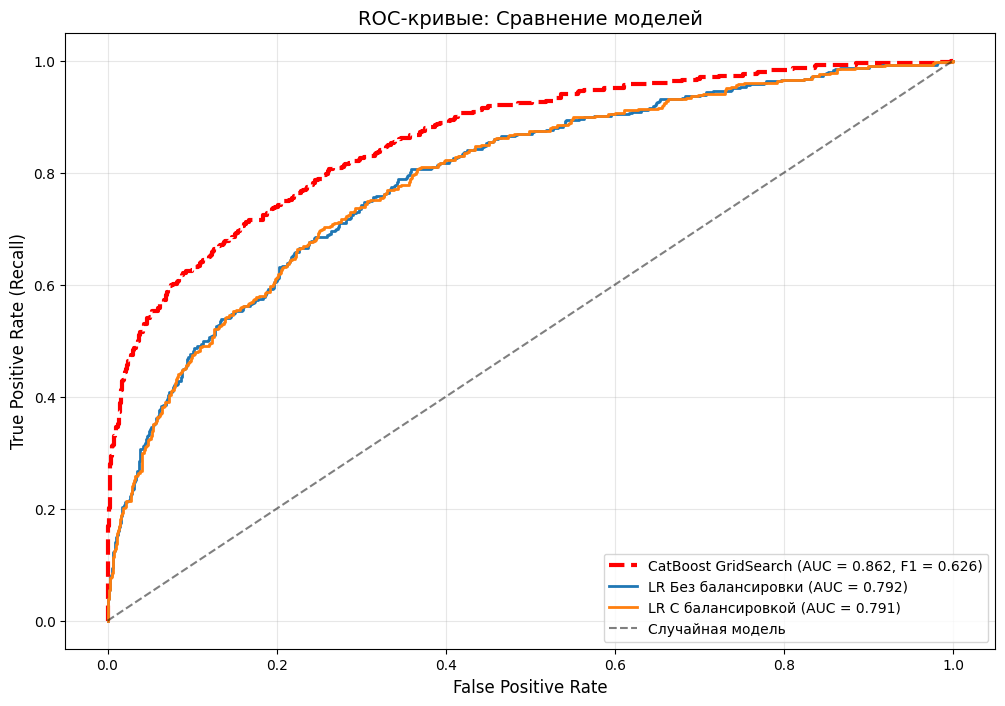


=== ВАЖНОСТЬ ПРИЗНАКОВ CATBOOST ===
Топ-15 самых важных признаков:
                 feature  importance
2          NumOfProducts     25.5679
0                    Age     15.2841
5        EstimatedSalary     10.1119
12         Balance_Level      8.4424
4         IsActiveMember      8.0230
15     Age_Group_Encoded      5.6893
1                 Tenure      5.3845
7            Geo_Germany      5.2970
18  CreditScore_Category      4.3337
10           Gender_Male      1.7650
6             Geo_France      1.7577
11          Balance_Zero      1.6010
9          Gender_Female      1.5888
8              Geo_Spain      1.4918
3              HasCrCard      1.0452


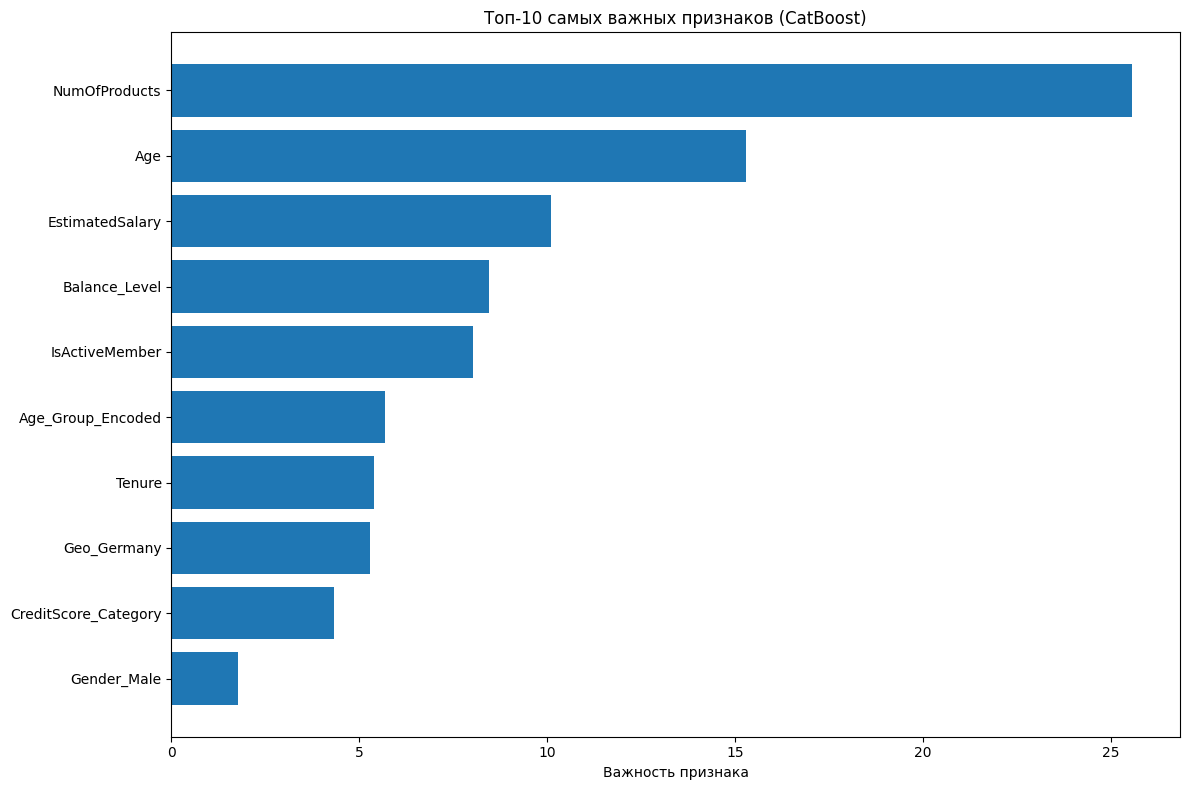


=== ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ ===
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.65      0.61      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000


=== АНАЛИЗ ПРЕДСКАЗАНИЙ ===
Доля предсказанных положительных классов: 0.191
Истинная доля положительных классов: 0.203


In [235]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier

# 1. Подготовка данных
X = df_feature_clean.drop('Exited', axis=1)
y = df_feature_clean['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов: {y_train.value_counts(normalize=True).to_dict()}")

# 2. Создание пайплайна с CatBoost
catboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Обработка пропусков
    ('scaler', StandardScaler()),                   # Масштабирование
    ('catboost', CatBoostClassifier(
        random_state=42,
        verbose=False,  # Отключаем вывод для GridSearch
        task_type='CPU'  # Используем CPU для стабильности
    ))
])

# 3. Параметры для GridSearch (упрощенная сетка для скорости)
param_grid = {
    'catboost__iterations': [300, 500],
    'catboost__depth': [6, 8],
    'catboost__learning_rate': [0.05, 0.1],
    'catboost__l2_leaf_reg': [3, 5],
    'catboost__auto_class_weights': ['SqrtBalanced'],
    'catboost__eval_metric': ['F1']
}

# 4. GridSearch с оптимизацией по F1-Score
print("=== ЗАПУСК GRIDSEARCH ДЛЯ CATBOOST ===")
print(f"Всего комбинаций: {len(param_grid['catboost__iterations']) * len(param_grid['catboost__depth']) * len(param_grid['catboost__learning_rate']) * len(param_grid['catboost__l2_leaf_reg'])}")

grid_search = GridSearchCV(
    catboost_pipeline,
    param_grid,
    cv=3,  # 3-fold кросс-валидация
    scoring='f1',  # Оптимизируем F1-score
    n_jobs=1,
    verbose=1
)

# Запускаем поиск
grid_search.fit(X_train, y_train)

# 5. Лучшие параметры
print(f"\n=== ЛУЧШИЕ ПАРАМЕТРЫ ===")
print(f"Лучший F1-score: {grid_search.best_score_:.4f}")
print("Лучшие параметры:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# 6. Лучшая модель
best_catboost_model = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_pred_cat = best_catboost_model.predict(X_test)
y_proba_cat = best_catboost_model.predict_proba(X_test)[:, 1]

# 7. Функция для оценки моделей
def print_metrics_catboost(y_true, y_pred, y_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    
    print(f"\n{model_name}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"Предсказано 1: {sum(y_pred)}/{len(y_pred)}")
    
    # Матрица ошибок
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"Матрица ошибок:\n{cm}")
    
    return accuracy, recall, precision, f1, roc_auc

# 8. Результаты CatBoost с GridSearch
print("\n=== РЕЗУЛЬТАТЫ CATBOOST С GRIDSEARCH ===")
acc_cat, recall_cat, prec_cat, f1_cat, auc_cat = print_metrics_catboost(
    y_test, y_pred_cat, y_proba_cat, "CatBoost с GridSearch"
)

# 9. Сравнение с предыдущими моделями (если они есть)
try:
    # ROC для сравнения с предыдущими моделями
    plt.figure(figsize=(12, 8))
    
    # ROC для CatBoost
    fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
    plt.plot(fpr_cat, tpr_cat, 
             label=f'CatBoost GridSearch (AUC = {auc_cat:.3f}, F1 = {f1_cat:.3f})', 
             linewidth=3, linestyle='--', color='red')
    
    # Добавляем предыдущие модели если они существуют
    if 'y_proba_no_balance' in locals() and 'roc_auc_no_balance' in locals():
        fpr_no_balance, tpr_no_balance, _ = roc_curve(y_test, y_proba_no_balance)
        fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_proba_balanced)
        
        plt.plot(fpr_no_balance, tpr_no_balance, 
                 label=f'LR Без балансировки (AUC = {roc_auc_no_balance:.3f})', linewidth=2)
        plt.plot(fpr_balanced, tpr_balanced, 
                 label=f'LR С балансировкой (AUC = {roc_auc_balanced:.3f})', linewidth=2)
    
    plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель', alpha=0.5)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.title('ROC-кривые: Сравнение моделей', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()

except NameError:
    print("\nПредыдущие модели не найдены для сравнения")
    
    # ROC только для CatBoost
    plt.figure(figsize=(10, 6))
    fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
    plt.plot(fpr_cat, tpr_cat, 
             label=f'CatBoost GridSearch (AUC = {auc_cat:.3f}, F1 = {f1_cat:.3f})', 
             linewidth=2, color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC-кривая CatBoost с GridSearch')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 10. Важность признаков из лучшей CatBoost модели
print("\n=== ВАЖНОСТЬ ПРИЗНАКОВ CATBOOST ===")

# Достаем CatBoost модель из пайплайна
catboost_model = best_catboost_model.named_steps['catboost']

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': catboost_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Топ-15 самых важных признаков:")
print(feature_importance.head(15))

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Важность признака')
plt.title('Топ-10 самых важных признаков (CatBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 11. Детальный отчет по лучшей модели
from sklearn.metrics import classification_report

print("\n=== ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ ===")
print(classification_report(y_test, y_pred_cat))

# 12. Анализ предсказаний
print("\n=== АНАЛИЗ ПРЕДСКАЗАНИЙ ===")
print(f"Доля предсказанных положительных классов: {y_pred_cat.mean():.3f}")
print(f"Истинная доля положительных классов: {y_test.mean():.3f}")


получилось увеличить F1 

## Попробуем использовать ADASYN для oversamplingА данных
Обучим CatBoost с оверсэмплингом и RandomizedSearch 

Запуск RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Лучшие параметры:
  catboost__learning_rate: 0.03
  catboost__l2_leaf_reg: 5
  catboost__iterations: 200
  catboost__depth: 8
  catboost__auto_class_weights: Balanced
  adasyn__sampling_strategy: 0.8
  adasyn__n_neighbors: 3
Best CV F1: 0.6162

Метрики:
       accuracy  precision  recall     f1  roc_auc
Train    0.8719     0.6940  0.6638 0.6786   0.9062
Test     0.8565     0.6596  0.6093 0.6335   0.8691

Оптимальный порог: 0.52, F1 = 0.6346


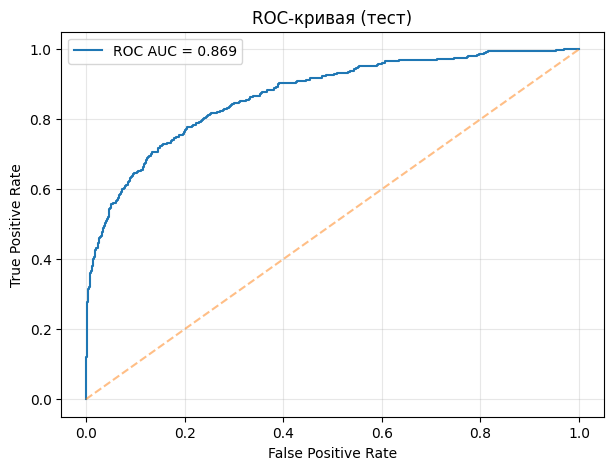


Топ-10 признаков:
                 feature  importance
15     Age_Group_Encoded     20.4307
2          NumOfProducts     18.7918
12         Balance_Level     17.4151
18  CreditScore_Category     11.5598
1                 Tenure      6.8767
4         IsActiveMember      6.7410
0                    Age      6.2203
7            Geo_Germany      2.4292
5        EstimatedSalary      1.7553
11          Balance_Zero      1.1485


In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Подготовка данных ---
X = df_feature_clean.drop('Exited', axis=1)
y = df_feature_clean['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- Пайплайн ---
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(random_state=42)),
    ('catboost', CatBoostClassifier(
        random_state=42,
        verbose=False,
        task_type='GPU',
        devices='0'
    ))
])

# --- Параметры поиска ---
param_dist = {
    'adasyn__sampling_strategy': [0.8, 1.0],
    'adasyn__n_neighbors': [3, 5],
    'catboost__iterations': [200, 400],
    'catboost__depth': [6, 8],
    'catboost__learning_rate': [0.03, 0.08],
    'catboost__l2_leaf_reg': [3, 5],
    'catboost__auto_class_weights': ['None', 'Balanced']  # исправлено
}

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=1,
    verbose=1
)

# --- Обучение ---
print("Запуск RandomizedSearchCV...")
search.fit(X_train, y_train)

print("\nЛучшие параметры:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV F1: {search.best_score_:.4f}")

best_model = search.best_estimator_

# --- Предсказания ---
y_pred_train = best_model.predict(X_train)
y_proba_train = best_model.predict_proba(X_train)[:, 1]
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# --- Функция метрик ---
def metrics_dict(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba)
    }

metrics_train = metrics_dict(y_train, y_pred_train, y_proba_train)
metrics_test = metrics_dict(y_test, y_pred_test, y_proba_test)

# --- Таблица результатов ---
results = pd.DataFrame([metrics_train, metrics_test], index=['Train', 'Test'])
pd.set_option('display.float_format', '{:.4f}'.format)
print("\nМетрики:")
print(results)

# --- Оптимальный порог по F1 ---
thresholds = np.arange(0.1, 0.9, 0.02)
best_thr, best_f1 = 0.5, 0
for thr in thresholds:
    y_temp = (y_proba_test >= thr).astype(int)
    f1_val = f1_score(y_test, y_temp)
    if f1_val > best_f1:
        best_thr, best_f1 = thr, f1_val

print(f"\nОптимальный порог: {best_thr:.2f}, F1 = {best_f1:.4f}")

# --- ROC-кривая ---
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {metrics_test["roc_auc"]:.3f}')
plt.plot([0, 1], [0, 1], '--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая (тест)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Важность признаков ---
cat_model = best_model.named_steps['catboost']
fi = pd.DataFrame({'feature': X.columns, 'importance': cat_model.get_feature_importance()})
print("\nТоп-10 признаков:")
print(fi.sort_values('importance', ascending=False).head(10))


Получилось улучшить метрику F1-Score

## Сравним все обученные модели

                                      Accuracy  Recall  Precision     F1  \
Модель                                                                     
CatBoost + ADASYN + RandomizedSearch    0.8565  0.6093     0.6596 0.6335   
CatBoost GridSearch                     0.8525  0.6069     0.6466 0.6261   
LogReg без балансировки                 0.8200  0.2334        NaN 0.3455   
LogReg с балансировкой                  0.7195  0.7174        NaN 0.5100   

                                      ROC-AUC  
Модель                                         
CatBoost + ADASYN + RandomizedSearch   0.8691  
CatBoost GridSearch                    0.8616  
LogReg без балансировки                0.7905  
LogReg с балансировкой                 0.7902  


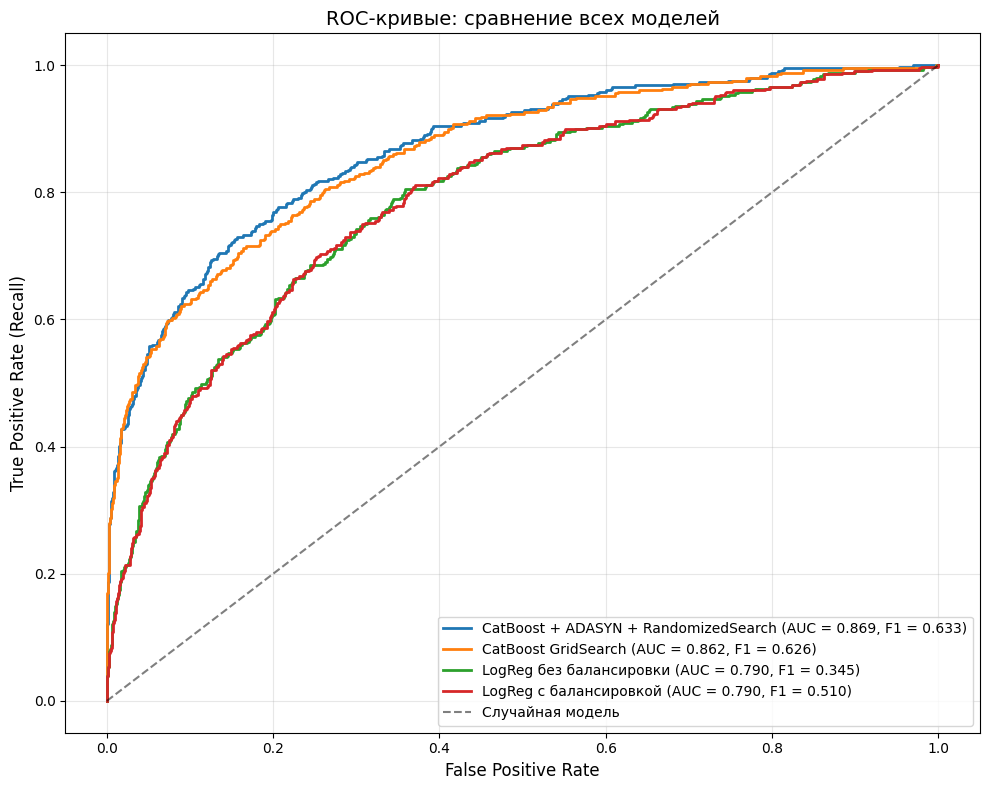

In [237]:
# --- Сравнение всех моделей и визуализация ROC ---
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# --- Проверяем, что все необходимые модели есть ---
models_data = []

# 1 CatBoost + ADASYN
if 'y_test' in locals() and 'y_pred_test' in locals() and 'y_proba_test' in locals():
    models_data.append({
        'name': 'CatBoost + ADASYN + RandomizedSearch',
        'y_true': y_test,
        'y_pred': y_pred_test,
        'y_proba': y_proba_test,
        'metrics': metrics_test
    })

# 2 CatBoost с GridSearch
if 'y_pred_cat' in locals() and 'y_proba_cat' in locals():
    models_data.append({
        'name': 'CatBoost GridSearch',
        'y_true': y_test,
        'y_pred': y_pred_cat,
        'y_proba': y_proba_cat,
        'metrics': {
            'accuracy': acc_cat,
            'precision': prec_cat,
            'recall': recall_cat,
            'f1': f1_cat,
            'roc_auc': auc_cat
        }
    })

# 3 Логистическая регрессия без балансировки
if 'y_pred_no_balance' in locals() and 'y_proba_no_balance' in locals():
    models_data.append({
        'name': 'LogReg без балансировки',
        'y_true': y_test,
        'y_pred': y_pred_no_balance,
        'y_proba': y_proba_no_balance,
        'metrics': {
            'accuracy': accuracy_no_balance,
            'precision': None,  # Пропустим, если не считалось ранее
            'recall': recall_no_balance,
            'f1': f1_no_balance,
            'roc_auc': auc_no_balance
        }
    })

# 4 Логистическая регрессия с балансировкой
if 'y_pred_balanced' in locals() and 'y_proba_balanced' in locals():
    models_data.append({
        'name': 'LogReg с балансировкой',
        'y_true': y_test,
        'y_pred': y_pred_balanced,
        'y_proba': y_proba_balanced,
        'metrics': {
            'accuracy': accuracy_balanced,
            'precision': None,
            'recall': recall_balanced,
            'f1': f1_balanced,
            'roc_auc': auc_balanced
        }
    })

# --- Таблица метрик ---
metrics_df = pd.DataFrame([
    {
        'Модель': m['name'],
        'Accuracy': m['metrics']['accuracy'],
        'Recall': m['metrics']['recall'],
        'Precision': m['metrics'].get('precision', np.nan),
        'F1': m['metrics']['f1'],
        'ROC-AUC': m['metrics']['roc_auc']
    }
    for m in models_data
]).set_index('Модель')

print(metrics_df.round(4))


# --- Общий график ROC ---
plt.figure(figsize=(10, 8))

for m in models_data:
    fpr, tpr, _ = roc_curve(m['y_true'], m['y_proba'])
    plt.plot(
        fpr, tpr,
        label=f"{m['name']} (AUC = {m['metrics']['roc_auc']:.3f}, F1 = {m['metrics']['f1']:.3f})",
        linewidth=2
    )

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label="Случайная модель")
plt.title("ROC-кривые: сравнение всех моделей", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Итоговое тестирование и сравнение моделей

| Модель                               | Accuracy   | Recall     | Precision  | F1         | ROC-AUC    |
| ------------------------------------ | ---------- | ---------- | ---------- | ---------- | ---------- |
| CatBoost + ADASYN + RandomizedSearch | **0.8565** | **0.6093** | **0.6596** | **0.6335** | **0.8691** |
| CatBoost GridSearch                  | 0.8525     | 0.6069     | 0.6466     | 0.6261     | 0.8616     |
| LogReg без балансировки              | 0.8200     | 0.2334     | —          | 0.3455     | 0.7905     |
| LogReg с балансировкой               | 0.7195     | 0.7174     | —          | 0.5100     | 0.7902     |



### Выбор финальной модели

Наилучший результат по **F1-мере (0.6335)** показала модель **CatBoost + ADASYN + RandomizedSearch**.
Она также демонстрирует **высокий ROC-AUC (0.8691)**, что говорит о хорошем разделении классов.



### Интерпретация метрик

* **F1-мера** — основной критерий выбора модели, так как классы несбалансированы, и важно найти баланс между полнотой (Recall) и точностью (Precision).
  Высокое значение F1 = 0.63 означает, что модель уверенно классифицирует положительный класс с умеренным числом ложных срабатываний.

* **ROC-AUC = 0.8691** показывает, что модель хорошо различает клиентов, которые уйдут, и тех, кто останется.
  Однако F1 и ROC-AUC могут различаться: ROC-AUC отражает *способность различать классы в целом*, тогда как F1 фокусируется на *пороговом решении*.



### Практическая значимость и рекомендации

* **Рекомендовано использовать модель CatBoost + ADASYN + RandomizedSearch** в бизнес-процессе прогнозирования оттока клиентов.
  Она обеспечивает оптимальный баланс между полнотой и точностью предсказаний.

* **Применение:**

  * использовать модель для раннего выявления клиентов с высоким риском оттока;
  * включить результаты в CRM-систему для приоритизации удерживающих акций;
  * при необходимости повысить полноту (Recall) — можно сдвинуть порог классификации без переобучения модели.


## Посмотрим на сколько точно можно предсказать значение `Tenure` с помощью регрессии

In [238]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [239]:
test_tenure_df = df_tenure_clean.copy()

df_tenure_clean.head()

,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,...,Gender_Male,Balance_Zero,Balance_Level,Age_Under_20,Age_60_Plus,Age_Group_Encoded,CreditScore_Very_Poor,CreditScore_Excellent,CreditScore_Category,CreditScore_Good_Plus
0,42,2.0000,1,1,1,101348.8800,1,1,0,0,...,0,1,0,0,0,3,0,0,2,0
1,41,1.0000,1,0,1,112542.5800,0,0,0,1,...,0,0,1,0,0,3,0,0,2,0
2,42,8.0000,3,1,0,113931.5700,1,1,0,0,...,0,0,3,0,0,3,0,0,1,0
3,39,1.0000,2,0,0,93826.6300,0,1,0,0,...,0,1,0,0,0,3,0,0,3,1
4,43,2.0000,1,1,1,79084.1000,0,0,0,1,...,0,0,3,0,0,3,0,1,5,1


In [240]:
# Удаляем строки с пропусками в Tenure
test_tenure_df = test_tenure_df[test_tenure_df['Tenure'].notna()].copy()
test_tenure_df.head(15)

,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,...,Gender_Male,Balance_Zero,Balance_Level,Age_Under_20,Age_60_Plus,Age_Group_Encoded,CreditScore_Very_Poor,CreditScore_Excellent,CreditScore_Category,CreditScore_Good_Plus
0,42,2.0000,1,1,1,101348.8800,1,1,0,0,...,0,1,0,0,0,3,0,0,2,0
1,41,1.0000,1,0,1,112542.5800,0,0,0,1,...,0,0,1,0,0,3,0,0,2,0
2,42,8.0000,3,1,0,113931.5700,1,1,0,0,...,0,0,3,0,0,3,0,0,1,0
3,39,1.0000,2,0,0,93826.6300,0,1,0,0,...,0,1,0,0,0,3,0,0,3,1
4,43,2.0000,1,1,1,79084.1000,0,0,0,1,...,0,0,3,0,0,3,0,1,5,1
5,44,8.0000,2,1,0,149756.7100,1,0,0,1,...,1,0,2,0,0,3,0,0,2,0
6,50,7.0000,2,1,1,10062.8000,0,1,0,0,...,1,1,0,0,0,4,0,1,5,1
7,29,4.0000,4,1,0,119346.8800,1,0,1,0,...,0,0,2,0,0,2,1,0,0,0
8,44,4.0000,2,0,1,74940.5000,0,1,0,0,...,1,0,3,0,0,3,0,0,1,0
9,27,2.0000,1,1,1,71725.7300,0,1,0,0,...,1,0,3,0,0,2,0,0,3,1


In [241]:
len(test_tenure_df.columns)

21

## Пробуем обучить модель регрессии что бы заполнить `Tenure`

In [242]:
# Разделяем на признаки и целевую переменную
X = test_tenure_df.drop('Tenure', axis=1)
y = test_tenure_df['Tenure']

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель с использованием GPU
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Используем все доступные CPU ядра
)

model.fit(X_train_scaled, y_train)

# Предсказываем на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оцениваем качество
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.57
R² Score: -0.07


Качественно предсказывать не получается, попробуем классификатор на 11 классов

In [243]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Обучаем XGBoost модель
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    # Новый синтаксис для GPU
    tree_method='hist',  # Используем CPU алгоритм
    device='cuda',       # Но выполняем на GPU
    n_jobs=-1
)

print("Обучение XGBoost...")
xgb_model.fit(X_train_scaled, y_train)

# Предсказываем
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)

# Оцениваем качество
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("=== МЕТРИКИ XGBoost ===")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"Точность: {accuracy_xgb*100:.2f}%")

Обучение XGBoost...
=== МЕТРИКИ XGBoost ===
Accuracy: 0.0984
Precision: 0.0960
Recall: 0.0984
F1-Score: 0.0960
Точность: 9.84%
